In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import spacy 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import plotly.express as px

In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams, pos_tag
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from spellchecker import SpellChecker
from textblob import TextBlob
import spacy
from collections import Counter
from spellchecker import SpellChecker
import language_tool_python
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scikit-learn

In [7]:
valid_set = pd.read_csv('valid_set.tsv', delimiter='\t', encoding='latin1')

In [8]:
sample_score= pd.read_csv('valid_sample_submission_5_column.csv')

In [9]:
training_set= pd.read_csv('training_set_rel3.tsv', delimiter='\t', encoding='latin1')

In [10]:
training_set.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
count,12976.000000,12976.000000,12976.000000,12976.000000,128.000000,12976.000000,1800.000000,1800.000000,1800.000000,2292.000000,...,2292.000000,2292.000000,723.000000,723.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,10295.395808,4.179485,4.127158,4.137408,37.828125,6.800247,3.333889,3.330556,3.333889,2.444154,...,2.635689,2.710297,3.777317,3.589212,3.945312,3.890625,4.078125,3.992188,3.843750,3.617188
std,6309.074105,2.136913,4.212544,4.264330,5.240829,8.970705,0.729103,0.726807,0.729103,1.211730,...,1.142566,1.045795,0.689401,0.693256,0.643668,0.630390,0.622535,0.509687,0.538845,0.603417
min,1.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000
25%,4438.750000,2.000000,2.000000,2.000000,36.000000,2.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
50%,10044.500000,4.000000,3.000000,3.000000,40.000000,3.000000,3.000000,3.000000,3.000000,2.000000,...,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,15681.250000,6.000000,4.000000,4.000000,40.000000,8.000000,4.000000,4.000000,4.000000,3.000000,...,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,21633.000000,8.000000,30.000000,30.000000,50.000000,60.000000,4.000000,4.000000,4.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000


In [11]:
training_set.isnull().sum()

essay_id              0
essay_set             0
essay                 0
rater1_domain1        0
rater2_domain1        0
rater3_domain1    12848
domain1_score         0
rater1_domain2    11176
rater2_domain2    11176
domain2_score     11176
rater1_trait1     10684
rater1_trait2     10684
rater1_trait3     10684
rater1_trait4     10684
rater1_trait5     12253
rater1_trait6     12253
rater2_trait1     10684
rater2_trait2     10684
rater2_trait3     10684
rater2_trait4     10684
rater2_trait5     12253
rater2_trait6     12253
rater3_trait1     12848
rater3_trait2     12848
rater3_trait3     12848
rater3_trait4     12848
rater3_trait5     12848
rater3_trait6     12848
dtype: int64

In [12]:
# PreProcessing

In [13]:
training_set.dropna(axis=1, inplace= True)

In [14]:
training_set.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",4,4,8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,8


In [15]:
training_set.isnull().sum()

essay_id          0
essay_set         0
essay             0
rater1_domain1    0
rater2_domain1    0
domain1_score     0
dtype: int64

In [16]:
#Dropnon-relatedcolumns
training_set.drop(columns=['rater1_domain1','rater2_domain1'], axis=1, inplace=True)

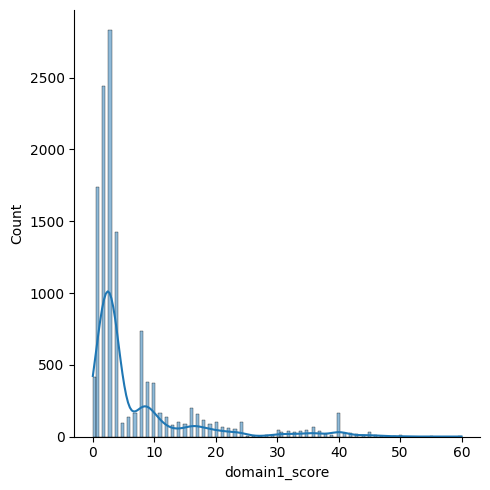

In [17]:
#Check Skewness
sns.displot(training_set['domain1_score'], kde=True)
plt.show()

In [18]:
# Normalizethedomain1_score
def normalizer(training_set, domain1_socre):
    min_values = training_set.groupby('essay_set')[domain1_socre].min()
    max_values = training_set.groupby('essay_set')[domain1_socre].max()
    training_set['normalized_score'] = training_set.apply(lambda row: int(20 * (row[domain1_socre] - min_values[row['essay_set']]) / (max_values[row['essay_set']] - min_values[row['essay_set']])), axis=1)
    return training_set


In [19]:
#Apply the Function normalizer to training set
training_set_normalized = (training_set.groupby('essay_set', group_keys=False, as_index=False).apply(lambda group: normalizer(group, 'domain1_score')))

In [20]:
training_set_normalized

,essay_id,essay_set,essay,domain1_score,normalized_score
0,1,1,"Dear local newspaper, I think effects computer...",8,12
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,14
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,10
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,16
4,5,1,"Dear @LOCATION1, I know having computers has a...",8,12
...,...,...,...,...,...
12971,21626,8,In most stories mothers and daughters are eit...,35,10
12972,21628,8,I never understood the meaning laughter is th...,32,8
12973,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",40,12
12974,21630,8,Trippin' on fen...,40,12


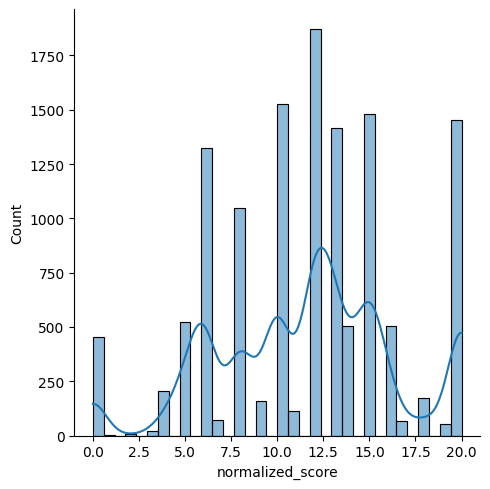

In [21]:
#Check Skew after normalization
sns.displot(training_set_normalized['normalized_score'], kde=True)
plt.show()

In [22]:
#Change character case
training_set_normalized['essay'] = training_set_normalized['essay'].str.lower()

In [23]:
training_set_normalized

,essay_id,essay_set,essay,domain1_score,normalized_score
0,1,1,"dear local newspaper, i think effects computer...",8,12
1,2,1,"dear @caps1 @caps2, i believe that using compu...",9,14
2,3,1,"dear, @caps1 @caps2 @caps3 more and more peopl...",7,10
3,4,1,"dear local newspaper, @caps1 i have found that...",10,16
4,5,1,"dear @location1, i know having computers has a...",8,12
...,...,...,...,...,...
12971,21626,8,in most stories mothers and daughters are eit...,35,10
12972,21628,8,i never understood the meaning laughter is th...,32,8
12973,21629,8,"when you laugh, is @caps5 out of habit, or is ...",40,12
12974,21630,8,trippin' on fen...,40,12


In [24]:
training_set.sample(800)

,essay_id,essay_set,essay,domain1_score
4778,7176,3,"In the story, Do not exceed posted speed limi...",1
11801,19073,7,Last @CAPS3 my mom ordered @CAPS1 @CAPS2 and I...,18
9229,15179,6,The installation of a mooring mass on top of t...,4
10867,18041,7,There was only @NUM1 minutes of class left and...,17
3061,4256,2,I believe books are writen for a reason and th...,3
...,...,...,...,...
10893,18070,7,This story is about chicken hand the fox and a...,20
963,966,1,"Dear the daily newspaper crew, I have seen som...",7
6790,10349,4,The author concludes the story with this para...,1
9081,15031,6,There were many obstacles that the builders of...,3


In [25]:
dftr_processed= pd.read_csv('new_trainning_set.csv')

In [26]:
dftr_processed

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,auxiliary_verb_frequency,modal_verb_frequency,modifier_adverb_frequency,linking_adverb_frequency,place_adverb_frequency,subordinating_conjunction_frequency,correlative_conjunction_frequency,interjection_frequency,onomatopoeia_frequency,palindrome_frequency
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,10,4,3,0,1,6,12,0,0,12
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,19,14,4,0,0,6,5,0,1,25
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,12,4,2,0,0,1,3,0,0,13
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,22,14,2,0,1,5,11,0,1,11
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,35,24,8,0,2,7,9,0,2,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,21626,8,In most stories mothers and daughters are eit...,17,18,NaN,35,NaN,NaN,NaN,...,33,19,1,1,2,23,16,1,0,44
12972,21628,8,I never understood the meaning laughter is th...,15,17,NaN,32,NaN,NaN,NaN,...,14,10,3,0,0,9,11,0,0,32
12973,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20,26,40.0,40,NaN,NaN,NaN,...,15,6,7,0,1,16,14,0,0,44
12974,21630,8,Trippin' on fen...,20,20,NaN,40,NaN,NaN,NaN,...,14,7,3,0,2,13,6,1,0,34


In [27]:
dftr_processed.isnull().sum()

essay_id                               0
essay_set                              0
essay                                  0
rater1_domain1                         0
rater2_domain1                         0
                                      ..
subordinating_conjunction_frequency    0
correlative_conjunction_frequency      0
interjection_frequency                 0
onomatopoeia_frequency                 0
palindrome_frequency                   0
Length: 78, dtype: int64

In [28]:
dftr_processed.drop(columns=['rater1_domain1','rater2_domain1'], axis=1, inplace=True)

In [29]:
dftr_processed.dropna(axis=1, inplace= True)

In [30]:
dftr_processed

,essay_id,essay_set,essay,domain1_score,count_spelling_errors,text_length,num_sentences,num_words,avg_word_length,num_unique_words,...,auxiliary_verb_frequency,modal_verb_frequency,modifier_adverb_frequency,linking_adverb_frequency,place_adverb_frequency,subordinating_conjunction_frequency,correlative_conjunction_frequency,interjection_frequency,onomatopoeia_frequency,palindrome_frequency
0,1,1,"Dear local newspaper, I think effects computer...",8,22,1875,16,386,3.984456,181,...,10,4,3,0,1,6,12,0,0,12
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,22,2288,20,464,4.030172,209,...,19,14,4,0,0,6,5,0,1,25
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,10,1541,14,313,4.035144,161,...,12,4,2,0,0,1,3,0,0,13
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,52,3165,27,611,4.328969,267,...,22,14,2,0,1,5,11,0,1,11
4,5,1,"Dear @LOCATION1, I know having computers has a...",8,17,2569,30,517,4.071567,211,...,35,24,8,0,2,7,9,0,2,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,21626,8,In most stories mothers and daughters are eit...,35,32,4459,27,1007,3.596822,347,...,33,19,1,1,2,23,16,1,0,44
12972,21628,8,I never understood the meaning laughter is th...,32,21,2816,35,666,3.429429,228,...,14,10,3,0,0,9,11,0,0,32
12973,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",40,35,4597,41,997,3.805416,377,...,15,6,7,0,1,16,14,0,0,44
12974,21630,8,Trippin' on fen...,40,19,3085,39,684,3.654971,258,...,14,7,3,0,2,13,6,1,0,34


In [31]:
df_corr=dftr_processed.iloc[:,3:]
df_corr

,domain1_score,count_spelling_errors,text_length,num_sentences,num_words,avg_word_length,num_unique_words,function_word_frequency,content_word_frequency,ngram_counts,...,auxiliary_verb_frequency,modal_verb_frequency,modifier_adverb_frequency,linking_adverb_frequency,place_adverb_frequency,subordinating_conjunction_frequency,correlative_conjunction_frequency,interjection_frequency,onomatopoeia_frequency,palindrome_frequency
0,8,22,1875,16,386,3.984456,181,165,221,"Counter({('on', 'the'): 6, ('the', 'computer')...",...,10,4,3,0,1,6,12,0,0,12
1,9,22,2288,20,464,4.030172,209,181,283,"Counter({('a', 'computer'): 7, ('help', 'us'):...",...,19,14,4,0,0,6,5,0,1,25
2,7,10,1541,14,313,4.035144,161,132,181,"Counter({('.', 'Computers'): 4, ('time', 'on')...",...,12,4,2,0,0,1,3,0,0,13
3,10,52,3165,27,611,4.328969,267,208,403,"Counter({('@', 'CAPS2'): 7, ('@', 'CAPS3'): 7,...",...,22,14,2,0,1,5,11,0,1,11
4,8,17,2569,30,517,4.071567,211,216,301,"Counter({('.', 'The'): 6, ('computers', 'are')...",...,35,24,8,0,2,7,9,0,2,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,35,32,4459,27,1007,3.596822,347,385,622,"Counter({('@', 'CAPS13'): 17, (',', '@'): 10, ...",...,33,19,1,1,2,23,16,1,0,44
12972,32,21,2816,35,666,3.429429,228,256,410,"Counter({('@', 'CAPS4'): 10, ('.', ""''""): 8, (...",...,14,10,3,0,0,9,11,0,0,32
12973,40,35,4597,41,997,3.805416,377,380,617,"Counter({(',', '@'): 12, ('and', 'I'): 11, ('@...",...,15,6,7,0,1,16,14,0,0,44
12974,40,19,3085,39,684,3.654971,258,261,423,"Counter({('.', 'I'): 12, ('@', 'ORGANIZATION2'...",...,14,7,3,0,2,13,6,1,0,34


In [32]:
dftr_processed.iloc[:,3:].drop(columns=['ngram_counts'], axis=1, inplace=True)

In [33]:
dftr_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 54 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   essay_id                             12976 non-null  int64  
 1   essay_set                            12976 non-null  int64  
 2   essay                                12976 non-null  object 
 3   domain1_score                        12976 non-null  int64  
 4   count_spelling_errors                12976 non-null  int64  
 5   text_length                          12976 non-null  int64  
 6   num_sentences                        12976 non-null  int64  
 7   num_words                            12976 non-null  int64  
 8   avg_word_length                      12976 non-null  float64
 9   num_unique_words                     12976 non-null  int64  
 10  function_word_frequency              12976 non-null  int64  
 11  content_word_frequency      

In [34]:
# THE FEATURES HAHAHAHA
def calculate_features(text):
    """
    Calcule une série de fonctionnalités linguistiques à partir d'un texte donné.
    """

    # Préparation
    words = word_tokenize(text)
    sentences = sent_tokenize(text)
    word_counts = Counter(words)
    spell = SpellChecker()
    misspelled = spell.unknown(words)

    # 0. Faute d'Orthographe

    spell = SpellChecker(language='en')
    misspelled = spell.unknown(words)
    # Le nombre de mots mal orthographiés est le nombre de fautes d'orthographe
    count_spelling_errors = len(misspelled)

    # 1. Longueur du texte
    text_length = len(text)

    # 2. Nombre de phrases
    num_sentences = len(sentences)

    # 3. Nombre de mots
    num_words = len(words)

    # 4. Taille moyenne des mots
    avg_word_length = sum(len(word) for word in words) / num_words

    # 5. Nombre de mots uniques
    num_unique_words = len(set(words))

    # 6. Fréquence des mots de fonction
    function_words = set(stopwords.words('english'))
    function_word_frequency = sum(word_counts[word] for word in function_words)

    # 7. Fréquence des mots de contenu
    content_words = set(words) - function_words
    content_word_frequency = sum(word_counts[word] for word in content_words)

    # 9. Fréquence des erreurs d'orthographe
    spelling_errors = len(misspelled)

    # 10. Fréquence des erreurs de grammaire


    # 11. Fréquence des mots positifs/négatifs
    # Ceci nécessiterait une liste de mots positifs/négatifs
    # Ici, nous utilisons le module NLTK's Vader qui a une liste intégrée de mots positifs et négatifs
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    positive_word_proportion = sentiment['pos']
    negative_word_proportion = sentiment['neg']

    # 12. Fréquence des entités nommées
    # Ceci est plus complexe à calculer et nécessiterait une bibliothèque spécialisée
    # Ici, nous utilisons la bibliothèque SpaCy qui a un bon support pour l'extraction d'entités nommées
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    named_entities = [ent.text for ent in doc.ents]
    named_entity_frequency = len(named_entities)

    # 13. Fréquence des citations
    quote_frequency = text.count('"') // 2

    # 14. Fréquence des majuscules
    uppercase_frequency = sum(1 for char in text if char.isupper())

    # 15. Fréquence des signes de ponctuation
    punctuation_marks = {'.', ',', '!', '?', ':', ';', '-', '(', ')', '[', ']', '{', '}', '"', "'"}
    punctuation_frequency = sum(text.count(mark) for mark in punctuation_marks)

    # 16. Fréquence des adverbes
    adverb_frequency = sum(1 for word, pos in pos_tag(words) if pos == 'RB')

    # 17. Fréquence des verbes au passé
    past_tense_verb_frequency = sum(1 for word, pos in pos_tag(words) if pos == 'VBD')

    # 18. Fréquence des verbes au présent
    present_tense_verb_frequency = sum(1 for word, pos in pos_tag(words) if pos in ('VB', 'VBG', 'VBP', 'VBZ'))

    # 19. Fréquence des pronoms
    pronoun_frequency = sum(1 for word, pos in pos_tag(words) if pos in ('PRP', 'PRP$', 'WP', 'WP$'))

    # 20. Fréquence des conjonctions de coordination
    coordinating_conjunction_frequency = sum(1 for word, pos in pos_tag(words) if pos == 'CC')

    # 21. Fréquence des adjectifs : Les adjectifs modifient les noms et peuvent indiquer le style d’écriture.
    tagged = pos_tag(word_tokenize(text))
    adjective_frequency = sum(1 for word, pos in tagged if pos == 'JJ')

    # 22. Fréquence des noms propres : Les noms propres sont des noms spécifiques à des personnes, des lieux, etc. Leur fréquence peut indiquer le sujet du texte.
    tagged_np = pos_tag(word_tokenize(text))
    proper_noun_frequency = sum(1 for word, pos in tagged_np if pos == 'NNP')

    # 23. Fréquence des modaux : Les modaux sont des auxiliaires qui expriment la nécessité, la possibilité, la permission, etc. Leur fréquence peut indiquer le ton du texte.
    tagged_mf = pos_tag(word_tokenize(text))
    modal_frequency = sum(1 for word, pos in tagged_mf if pos == 'MD')

    # 24. Fréquence des déterminants : Les déterminants sont des mots qui précèdent les noms pour indiquer leur référence. Leur fréquence peut indiquer le style d’écriture.
    tagged_df = pos_tag(word_tokenize(text))
    determiner_frequency = sum(1 for word, pos in tagged_df if pos == 'DT')

    # 25. Fréquence des prépositions : Les prépositions relient les noms, les pronoms et les phrases à d’autres mots dans une phrase. Leur fréquence peut indiquer la complexité de la structure des phrases.
    tagged_pf = pos_tag(word_tokenize(text))
    preposition_frequency = sum(1 for word, pos in tagged_pf if pos == 'IN')

    # 26. Fréquence des pronoms interrogatifs : Les pronoms interrogatifs introduisent des questions. Leur fréquence peut indiquer si le texte contient beaucoup de questions.
    tagged_ipf = pos_tag(word_tokenize(text))
    interrogative_pronoun_frequency = sum(1 for word, pos in tagged_ipf if pos in ('WP', 'WP$'))

    # 27. Fréquence des adverbes interrogatifs : Les adverbes interrogatifs introduisent des questions. Leur fréquence peut indiquer si le texte contient beaucoup de questions.
    tagged_iaf = pos_tag(word_tokenize(text))
    interrogative_adverb_frequency = sum(1 for word, pos in tagged_iaf if pos == 'WRB')

    # 28. Fréquence des adverbes de négation : Les adverbes de négation expriment une négation. Leur fréquence peut indiquer le ton du texte
    tagged_naf = pos_tag(word_tokenize(text))
    negation_adverb_frequency = sum(1 for word, pos in tagged_naf if word in ('not', 'never', 'no'))

    # 29. Fréquence des adverbes de degré : Les adverbes de degré modifient les adjectifs et les adverbes pour indiquer le degré. Leur fréquence peut indiquer le style d’écriture.
    tagged_daf = pos_tag(word_tokenize(text))
    degree_adverb_frequency = sum(1 for word, pos in tagged_daf if word in ('very', 'too', 'so', 'quite', 'pretty', 'rather', 'somewhat', 'fairly'))

    # 30. Fréquence des adverbes de manière : Les adverbes de manière décrivent la manière dont une action est effectuée. Leur fréquence peut indiquer le style d’écriture.
    tagged_maf = pos_tag(word_tokenize(text))
    manner_adverb_frequency = sum(1 for word, pos in tagged_maf if pos == 'RB' and word.endswith('ly'))

    # 31. Fréquence des pronoms démonstratifs : Les pronoms démonstratifs indiquent des entités spécifiques. Leur fréquence peut indiquer le style d’écriture.
    tagged_dpf = pos_tag(word_tokenize(text))
    demonstrative_pronoun_frequency = sum(1 for word, pos in tagged_dpf if word in ('this', 'that', 'these', 'those'))

    # 32. Fréquence des pronoms possessifs : Les pronoms possessifs indiquent la possession. Leur fréquence peut indiquer le style d’écriture.
    tagged_ppf = pos_tag(word_tokenize(text))
    possessive_pronoun_frequency = sum(1 for word, pos in tagged_ppf if word in ('my', 'your', 'his', 'her', 'its', 'our', 'their'))

    # 33. Fréquence des pronoms réfléchis : Les pronoms réfléchis renvoient à d’autres entités dans la phrase. Leur fréquence peut indiquer le style d’écriture.
    tagged_rpf = pos_tag(word_tokenize(text))
    reflexive_pronoun_frequency = sum(1 for word, pos in tagged_rpf if word in ('myself', 'yourself', 'himself', 'herself', 'itself', 'ourselves', 'yourselves', 'themselves'))

    # 34. Fréquence des pronoms réciproques : Les pronoms réciproques indiquent une action mutuelle. Leur fréquence peut indiquer le style d’écriture.
    tagged_rpf2 = pos_tag(word_tokenize(text))
    reciprocal_pronoun_frequency = sum(1 for word, pos in tagged_rpf2 if word in ('each other', 'one another'))

    # 35. Fréquence des pronoms indéfinis : Les pronoms indéfinis ne renvoient pas à des entités spécifiques. Leur fréquence peut indiquer le style d’écriture.
    tagged_ipf2 = pos_tag(word_tokenize(text))
    indefinite_pronoun_frequency = sum(1 for word, pos in tagged_ipf2 if word in ('all', 'another', 'any', 'anybody', 'anyone', 'anything', 'each', 'everybody', 'everyone', 'everything', 'few', 'many', 'nobody', 'none', 'nothing', 'one', 'several', 'some', 'somebody', 'someone', 'something'))
    
    # 36. Fréquence des adjectifs possessifs : Les adjectifs possessifs indiquent la possession. Leur fréquence peut indiquer le style d’écriture.
    tagged_af = pos_tag(word_tokenize(text))
    possessive_adjective_frequency = sum(1 for word, pos in tagged_af if word in ('my', 'your', 'his', 'her', 'its', 'our', 'their'))

    # 37. Fréquence des adjectifs démonstratifs : Les adjectifs démonstratifs indiquent des entités spécifiques. Leur fréquence peut indiquer le style d’écriture.
    tagged_daf2 = pos_tag(word_tokenize(text))
    demonstrative_adjective_frequency = sum(1 for word, pos in tagged_daf2 if word in ('this', 'that', 'these', 'those'))

    # 38. Fréquence des adjectifs indéfinis : Les adjectifs indéfinis ne renvoient pas à des entités spécifiques. Leur fréquence peut indiquer le style d’écriture.
    tagged_iaf2 = pos_tag(word_tokenize(text))
    indefinite_adjective_frequency = sum(1 for word, pos in tagged_iaf2 if word in ('all', 'another', 'any', 'both', 'each', 'few', 'many', 'several', 'some'))

    # 39. Fréquence des adjectifs interrogatifs : Les adjectifs interrogatifs introduisent des questions. Leur fréquence peut indiquer si le texte contient beaucoup de questions.
    tagged_iaf3 = pos_tag(word_tokenize(text))
    interrogative_adjective_frequency = sum(1 for word, pos in tagged_iaf3 if word in ('which', 'what', 'whose'))

    # 40. Fréquence des adjectifs exclamatifs : Les adjectifs exclamatifs expriment une émotion ou une réaction. Leur fréquence peut indiquer le ton du texte.
    tagged_eaf = pos_tag(word_tokenize(text))
    exclamatory_adjective_frequency = sum(1 for word, pos in tagged_eaf if word in ('what', 'such'))

    # 41. Fréquence des verbes auxiliaires : Les verbes auxiliaires sont utilisés avec d’autres verbes pour indiquer le temps, la voix, l’humeur, etc. Leur fréquence peut indiquer le style d’écriture.
    tagged_avf = pos_tag(word_tokenize(text))
    auxiliary_verb_frequency = sum(1 for word, pos in tagged_avf if word in ('be', 'have', 'do', 'can', 'could', 'may', 'might', 'must', 'shall', 'should', 'will', 'would'))

    # 42. Fréquence des verbes modaux : Les verbes modaux expriment la nécessité, la possibilité, la permission, etc. Leur fréquence peut indiquer le ton du texte.
    tagged_mvf = pos_tag(word_tokenize(text))
    modal_verb_frequency = sum(1 for word, pos in tagged_mvf if word in ('can', 'could', 'may', 'might', 'must', 'shall', 'should', 'will', 'would'))
    
    # 43. Fréquence des adverbes modificateurs : Les adverbes modificateurs modifient les adjectifs et les adverbes pour indiquer le degré. Leur fréquence peut indiquer le style d’écriture.
    tagged_maf2 = pos_tag(word_tokenize(text))
    modifier_adverb_frequency = sum(1 for word, pos in tagged_maf2 if word in ('very', 'too', 'so', 'quite', 'pretty', 'rather', 'somewhat', 'fairly'))

    # 44. Fréquence des adverbes de liaison : Les adverbes de liaison introduisent une phrase ou une clause. Leur fréquence peut indiquer le style d’écriture.
    tagged_laf = pos_tag(word_tokenize(text))
    linking_adverb_frequency = sum(1 for word, pos in tagged_laf if word in ('however', 'therefore', 'consequently', 'meanwhile', 'furthermore', 'otherwise'))

    # 45. Fréquence des adverbes de négation : Les adverbes de négation expriment une négation. Leur fréquence peut indiquer le ton du texte.
    tagged_naf2 = pos_tag(word_tokenize(text))
    negation_adverb_frequency = sum(1 for word, pos in tagged_naf2 if word in ('not', 'never', 'no'))

    # 46. Fréquence des adverbes de degré : Les adverbes de degré modifient les adjectifs et les adverbes pour indiquer le degré. Leur fréquence peut indiquer le style d’écriture.
    tagged_daf3 = pos_tag(word_tokenize(text))
    degree_adverb_frequency = sum(1 for word, pos in tagged_daf3 if word in ('very', 'too', 'so', 'quite', 'pretty', 'rather', 'somewhat', 'fairly'))

    # 47. Fréquence des adverbes de manière : Les adverbes de manière décrivent la manière dont une action est effectuée. Leur fréquence peut indiquer le style d’écriture.
    tagged_maf3 = pos_tag(word_tokenize(text))
    manner_adverb_frequency = sum(1 for word, pos in tagged_maf3 if pos == 'RB' and word.endswith('ly'))

    # 48. Fréquence des adverbes de lieu : Les adverbes de lieu indiquent le lieu d’une action. Leur fréquence peut indiquer le sujet du texte.
    tagged_paf = pos_tag(word_tokenize(text))
    place_adverb_frequency = sum(1 for word, pos in tagged_paf if word in ('here', 'there', 'everywhere', 'somewhere', 'anywhere', 'nowhere'))

    # 49. Fréquence des conjonctions de coordination : Les conjonctions de coordination relient des mots, des phrases ou des clauses de même importance. Leur fréquence peut indiquer la complexité de la structure des phrases.
    tagged_ccf = pos_tag(word_tokenize(text))
    coordinating_conjunction_frequency = sum(1 for word, pos in tagged_ccf if word in ('and', 'but', 'or', 'so', 'yet', 'for', 'nor'))

    # 50. Fréquence des conjonctions de subordination : Les conjonctions de subordination relient une clause subordonnée à une clause principale. Leur fréquence peut indiquer la complexité de la structure des phrases.
    tagged_scf = pos_tag(word_tokenize(text))
    subordinating_conjunction_frequency = sum(1 for word, pos in tagged_scf if word in ('although', 'because', 'if', 'unless', 'while', 'though', 'whereas', 'as', 'since', 'when', 'until', 'after', 'before'))

    # 51. Fréquence des conjonctions corrélatives : Les conjonctions corrélatives travaillent en paires pour relier des mots, des phrases ou des clauses de même importance. Leur fréquence peut indiquer la complexité de la structure des phrases.
    tagged_ccf2 = pos_tag(word_tokenize(text))
    correlative_conjunction_frequency = sum(1 for word, pos in tagged_ccf2 if word in ('either', 'or', 'neither', 'nor', 'not only', 'but also', 'whether', 'or', 'as', 'as', 'so', 'as'))

    # 52. Fréquence des interjections : Les interjections sont des mots ou des expressions qui expriment une émotion ou une réaction. Leur fréquence peut indiquer le ton du texte.
    tagged_if = pos_tag(word_tokenize(text))
    interjection_frequency = sum(1 for word, pos in tagged_if if pos == 'UH')

    # 53. Fréquence des onomatopées : Les onomatopées sont des mots qui imitent les sons. Leur fréquence peut indiquer le sujet du texte.
    tagged_of = pos_tag(word_tokenize(text))
    onomatopoeia_frequency = sum(1 for word, pos in tagged_of if word in ('bang', 'beep', 'buzz', 'click', 'ding', 'hiss', 'pop', 'sizzle', 'snap', 'whack', 'whoosh', 'zip', 'clank', 'clang', 'creak', 'crunch', 'gulp', 'jingle', 'jangle', 'rattle', 'snore', 'sniff', 'snort', 'squeak', 'swoosh', 'thud', 'toot', 'twang', 'yelp', 'zing', 'boing', 'zap', 'pow', 'zip', 'swish', 'splash', 'crash', 'chirp', 'tweet', 'honk', 'vroom', 'beep', 'zoom', 'giggle', 'murmur', 'moo', 'oink', 'quack'))

    # 54. Fréquence des palindromes : Les palindromes sont des mots qui se lisent de la même manière de gauche à droite et de droite à gauche. Leur fréquence peut indiquer le style d’écriture.
    words = text.split()
    palindrome_frequency = sum(1 for word in words if word == word[::-1])

    return {
        'count_spelling_errors' : count_spelling_errors,
        'text_length': text_length,
        'num_sentences': num_sentences,
        'num_words': num_words,
        'avg_word_length': avg_word_length,
        'num_unique_words': num_unique_words,
        'function_word_frequency': function_word_frequency,
        'content_word_frequency': content_word_frequency,
        'spelling_errors': spelling_errors,
        'quote_frequency': quote_frequency,
        'uppercase_frequency': uppercase_frequency,
        'punctuation_frequency': punctuation_frequency,
        'adverb_frequency': adverb_frequency,
        'past_tense_verb_frequency': past_tense_verb_frequency,
        'present_tense_verb_frequency': present_tense_verb_frequency,
        'pronoun_frequency': pronoun_frequency,
        'coordinating_conjunction_frequency': coordinating_conjunction_frequency,
        'negative_word_proportion' : negative_word_proportion,
        'named_entity_frequency': named_entity_frequency,
        'adjective_frequency': adjective_frequency,
        'proper_noun_frequency' : proper_noun_frequency,
        'modal_frequency' : modal_frequency,
        'determiner_frequency' : determiner_frequency,
        'interrogative_adverb_frequency' : interrogative_adverb_frequency,
        'interrogative_pronoun_frequency' : interrogative_pronoun_frequency,
        'preposition_frequency' : preposition_frequency,
        'negation_adverb_frequency' : negation_adverb_frequency,
        'degree_adverb_frequency' : degree_adverb_frequency,
        'manner_adverb_frequency' : manner_adverb_frequency,
        'demonstrative_pronoun_frequency' : demonstrative_pronoun_frequency,
        'possessive_pronoun_frequency' : possessive_pronoun_frequency,
        'reflexive_pronoun_frequency' : reflexive_pronoun_frequency,
        'reciprocal_pronoun_frequency' : reciprocal_pronoun_frequency,
        'indefinite_pronoun_frequency' : indefinite_pronoun_frequency,
        'possessive_adjective_frequency' : possessive_adjective_frequency,
        'demonstrative_adjective_frequency' : demonstrative_adjective_frequency,
        'indefinite_adjective_frequency' : indefinite_adjective_frequency,
        'interrogative_adjective_frequency' : interrogative_adjective_frequency,
        'exclamatory_adjective_frequency' : exclamatory_adjective_frequency,
        'auxiliary_verb_frequency' : auxiliary_verb_frequency,
        'modal_verb_frequency' : modal_verb_frequency,
        'modifier_adverb_frequency' : modifier_adverb_frequency,
        'linking_adverb_frequency' : linking_adverb_frequency,
        'negation_adverb_frequency' : negation_adverb_frequency,
        'degree_adverb_frequency' : degree_adverb_frequency,
        'manner_adverb_frequency' : manner_adverb_frequency,
        'place_adverb_frequency' : place_adverb_frequency,
        'coordinating_conjunction_frequency' : coordinating_conjunction_frequency,
        'subordinating_conjunction_frequency' : subordinating_conjunction_frequency,
        'correlative_conjunction_frequency' : correlative_conjunction_frequency,
        'interjection_frequency' : interjection_frequency,
        'onomatopoeia_frequency' : onomatopoeia_frequency,
        'palindrome_frequency' : palindrome_frequency,

    }

In [62]:
# Application de la fonction sur le dftr_processed
 result_dftr = training_set_normalized['essay'].apply((lambda x: pd.Series(calculate_features(x))))

In [68]:
result_df_02 = pd.read_csv("result_dftr.csv", sep=',', index_col=0)
result_df_02.head()

,count_spelling_errors,text_length,num_sentences,num_words,avg_word_length,num_unique_words,function_word_frequency,content_word_frequency,spelling_errors,quote_frequency,...,auxiliary_verb_frequency,modal_verb_frequency,modifier_adverb_frequency,linking_adverb_frequency,place_adverb_frequency,subordinating_conjunction_frequency,correlative_conjunction_frequency,interjection_frequency,onomatopoeia_frequency,palindrome_frequency
0,22.0,1875.0,16.0,386.0,3.984456,181.0,165.0,221.0,22.0,0.0,...,10.0,4.0,3.0,0.0,1.0,6.0,12.0,0.0,0.0,12.0
1,22.0,2288.0,20.0,464.0,4.030172,209.0,181.0,283.0,22.0,0.0,...,19.0,14.0,4.0,0.0,0.0,6.0,5.0,0.0,1.0,25.0
2,10.0,1541.0,14.0,313.0,4.035144,161.0,132.0,181.0,10.0,0.0,...,12.0,4.0,2.0,0.0,0.0,1.0,3.0,0.0,0.0,13.0
3,52.0,3165.0,27.0,611.0,4.328969,267.0,208.0,403.0,52.0,1.0,...,22.0,14.0,2.0,0.0,1.0,5.0,11.0,0.0,1.0,11.0
4,17.0,2569.0,30.0,517.0,4.071567,211.0,216.0,301.0,17.0,0.0,...,35.0,24.0,8.0,0.0,2.0,7.0,9.0,0.0,2.0,16.0


In [69]:
new_training_set_02 = pd.concat([result_df_02,dftr_processed],axis=1)
new_training_set_02.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12976 entries, 0 to 12975
Columns: 103 entries, count_spelling_errors to palindrome_frequency
dtypes: float64(51), int64(50), object(2)
memory usage: 10.3+ MB


In [70]:
new_training_set_02.to_csv("new_training_set_02.csv", sep=',', encoding="latin1")

In [63]:
# check resultat_df
# result_dftr.info()



In [64]:
# result_dftr.to_csv('result_dftr.csv', sep=',', encoding="latin1")

In [40]:
#correlation_matrix = dftr_processed.iloc[:,3:].corr()

In [41]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


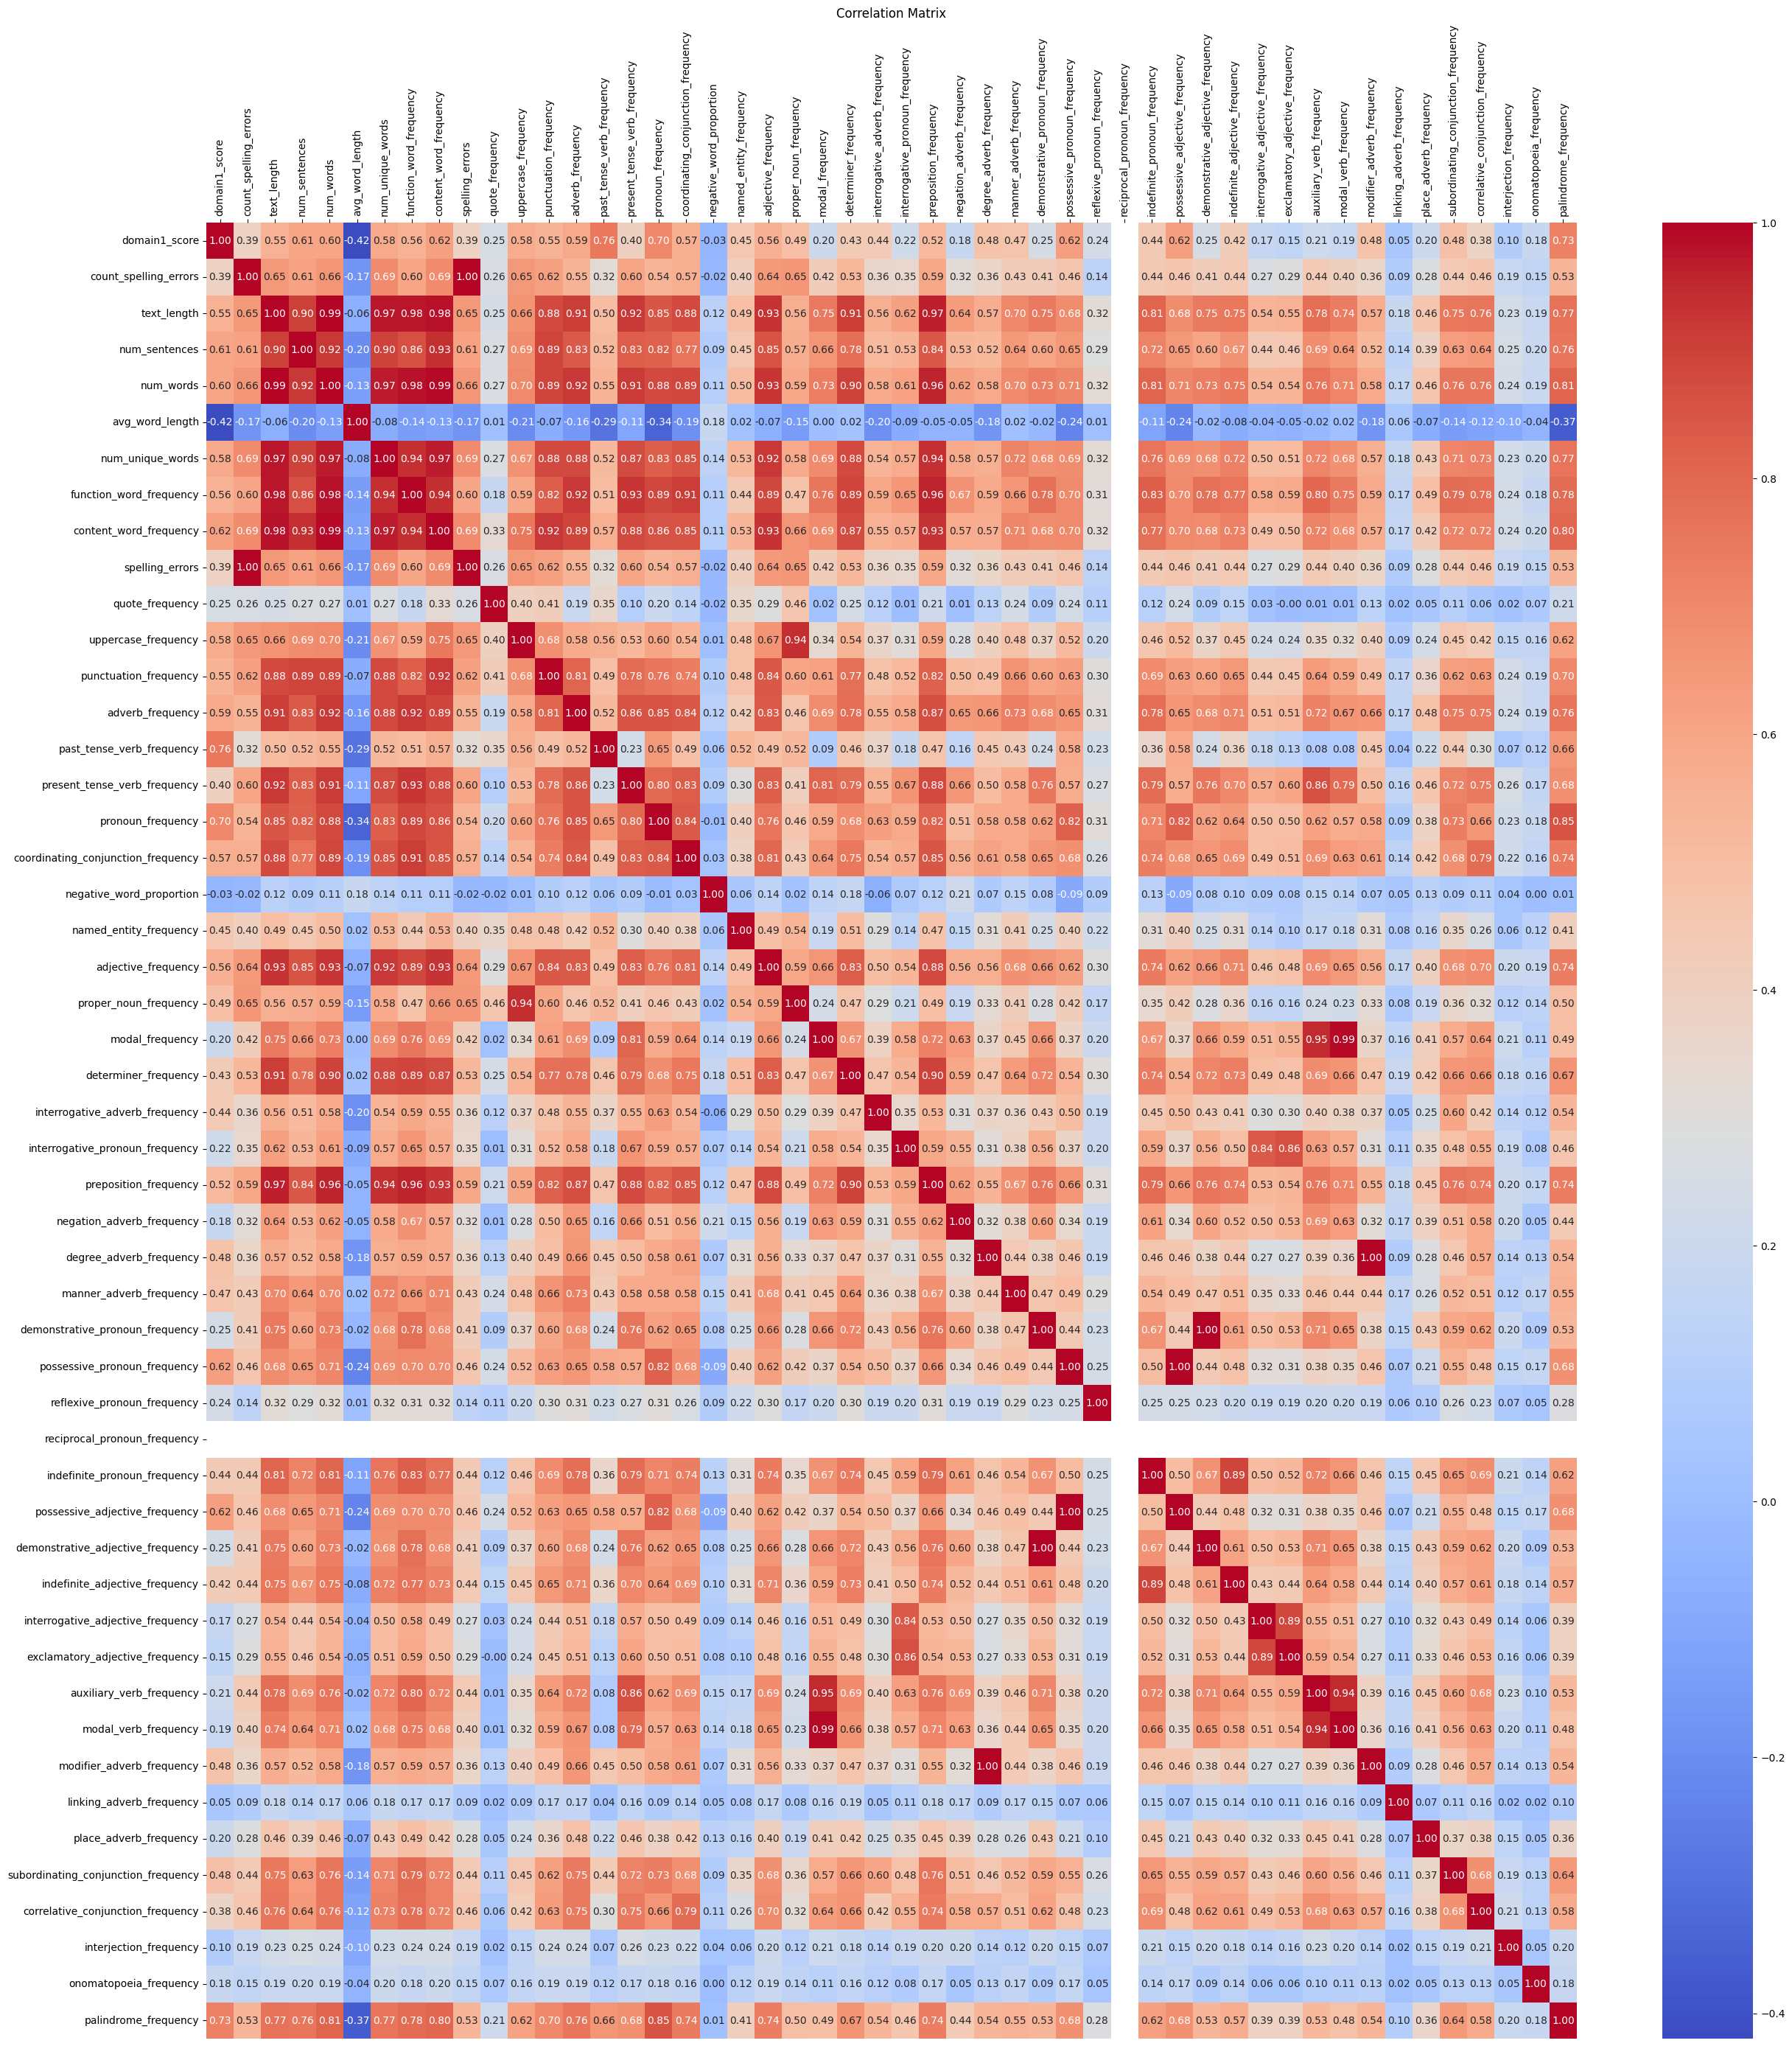

In [66]:
plt.figure(figsize=(30, 32))
ax=sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.title('Correlation Matrix')
plt.show()